## ASTRO 596: The Final Exam

Alex Gagliano, 05/10/2020

Let's start by importing our required packages.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from astropy.time import Time
from collections import Counter

sns.set_context("talk")
sns.set_style("white")
sns.set_palette("Dark2")

In [7]:
data = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/2020oi_allBands_0921.csv")
data = data[data['MJD'] > 57000]
data = data[data['MAG'] > 0]

In [8]:
UVOT = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/UVOT_Reductions/temp_from_younger_cluster/2020oi_Swift_3arcsec.csv")

In [9]:
np.unique(UVOT['FLT'])

array(['B', 'U', 'UVM2', 'UVW1', 'UVW2', 'V'], dtype=object)

In [10]:
np.unique(data['TELESCOPE'])
np.unique(data['FLT'])

array(['B', 'G', 'U', 'UVM2', 'UVW1', 'UVW2', 'V', 'g', 'g-ZTF', 'gp',
       'i', 'ip', 'orange', 'r', 'r-ZTF', 'rp', 'u', 'up', 'z'],
      dtype=object)

In [11]:
np.unique(data.loc[data['FLT'] == 'u', 'TELESCOPE'])

array(['Swope'], dtype=object)

In [12]:
UVOT['MAGERR'] = pd.to_numeric(UVOT['MAGERR'])
UVOT.replace(-999, 0.00, inplace=True)

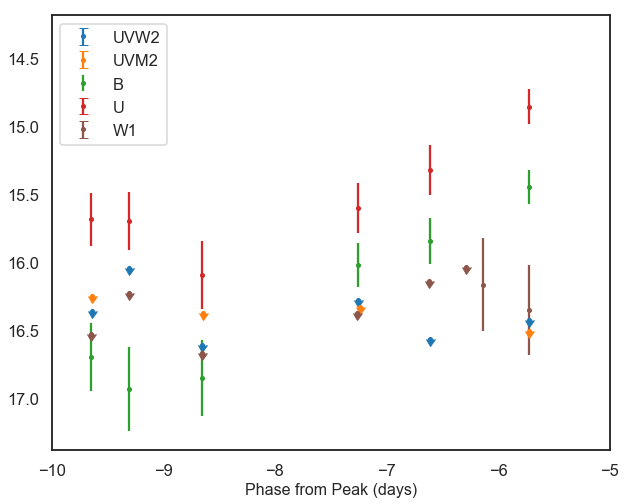

In [13]:
bb = UVOT[UVOT['FLT'] == 'B']
w2 = UVOT[UVOT['FLT'] == 'UVW2']
uu = UVOT[UVOT['FLT'] == 'U']
vv = UVOT[UVOT['FLT'] == 'V']
w1 = UVOT[UVOT['FLT'] == 'UVW1']
m2 = UVOT[UVOT['FLT'] == 'UVM2']

peak = 58866.1

#bb_new = UVOT_new[UVOT_new['Band'] == 'B']
#uu_new = UVOT_new[UVOT_new['Band'] == 'U']
#m2_new = UVOT_new[UVOT_new['Band'] == 'UVM2']
#w1_new = UVOT_new[UVOT_new['Band'] == 'UVW1']
#w2_new = UVOT_new[UVOT_new['Band'] == 'UVW2']
#vv_new = UVOT_new[UVOT_new['Band'] == 'V']

bb_ul = bb['ULIM']
uu_ul = uu['ULIM']
m2_ul = m2['ULIM']
w1_ul = w1['ULIM']
w2_ul = w2['ULIM']
vv_ul = vv['ULIM']

plt.figure(figsize=(10,8))
#plt.errorbar(w2_new['Time(MJD)'].values, w2_new['Mag'].values, yerr=w2_new['MagErr'], uplims=w2_ul, fmt='*', c='tab:blue')
#plt.errorbar(m2_new['Time(MJD)'].values, m2_new['Mag'].values, yerr=m2_new['MagErr'], uplims=m2_ul, fmt='*', c='tab:orange')
#plt.errorbar(bb_new['Time(MJD)'].values, bb_new['Mag'].values, yerr=bb_new['MagErr'], uplims=bb_ul, fmt='*', c='tab:green')
#plt.errorbar(uu_new['Time(MJD)'].values, uu_new['Mag'].values, yerr=uu_new['MagErr'], uplims=uu_ul, fmt='*', c='tab:red')
#plt.errorbar(vv_new['Time(MJD)'].values, vv_new['Mag'].values, yerr=vv_new['MagErr'], uplims=vv_ul, fmt='*', c='tab:purple')
#plt.errorbar(w1_new['Time(MJD)'].values, w1_new['Mag'].values, yerr=w1_new['MagErr'], uplims=w1_ul, fmt='*', c='tab:brown')

plt.errorbar(w2['MJD'].values-peak, w2['MAG'].values, yerr=w2['MAGERR'], uplims=w2_ul,ls='none', ms=4, marker='o', c='tab:blue', label='UVW2')
plt.errorbar(m2['MJD'].values-peak, m2['MAG'].values, yerr=m2['MAGERR'], uplims=m2_ul, marker='o', ms=4, ls='none',c='tab:orange', label='UVM2')
plt.errorbar(bb['MJD'].values-peak, bb['MAG'].values, yerr=bb['MAGERR'], uplims=bb_ul, marker='o', ms=4, ls='none',c='tab:green', label='B')
plt.errorbar(uu['MJD'].values-peak, uu['MAG'].values, yerr=uu['MAGERR'], uplims=uu_ul, marker='o', ms=4, ls='none',c='tab:red', label='U')
#plt.errorbar(vv['MJD'].values-peak, vv['MAG'].values, yerr=vv['MAGERR'], uplims=vv_ul, marker='o', ls='none',c='tab:purple', label='V')
plt.errorbar(w1['MJD'].values-peak, w1['MAG'].values, yerr=w1['MAGERR'], uplims=w1_ul, marker='o',ms=4,  ls='none',c='tab:brown', label='W1')

plt.legend()
plt.xlim((-10,-5))
plt.xlabel("Phase from Peak (days)",fontsize=16)
plt.gca().invert_yaxis()

(58850, 58880)

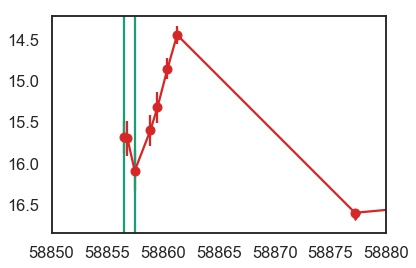

In [14]:
plt.errorbar(uu['MJD'].values, uu['MAG'].values, yerr=uu['MAGERR'], uplims=uu_ul, marker='o', c='tab:red', label='U')
plt.gca().invert_yaxis()
plt.axvline(x=58856.45)
plt.axvline(x=58857.45)
#constraining the shock breakout
plt.xlim((58850, 58880))
#nice!

In [15]:
uu['MJD']

33    58856.45
34    58856.79
35    58857.45
36    58858.85
37    58859.49
38    58860.38
39    58861.25
40    58877.19
41    58887.68
42    58887.69
43    58898.56
44    58898.57
45    58907.25
46    58907.26
Name: MJD, dtype: float64

In [16]:
data_dropSwift = data[~data['FLT'].isin(np.array(['UVM2', 'UVW1', 'UVW2', 'U', 'B', 'V']))]

In [17]:
data = pd.concat([UVOT, data_dropSwift], ignore_index=True)

We clean the data a bit by removing times long before the supernova and magnitudes that haven't been zeropoint corrected. 

In [69]:
data_thacher = pd.read_csv("../data/photometry/2020oi_thacher.phot", delim_whitespace=True, names=['MJD', 'FLT', 'MAG', 'MAGERR'])
data_thacher['TELESCOPE'] = 'Thacher'
data_thacher = data_thacher[data_thacher['MJD'] > 57000]
data_thacher = data_thacher[data_thacher['MAG'] > 0]
data = pd.concat([data, data_thacher])

In [70]:
HST_PHANGS = pd.read_csv("../data/photometry/HST_PHANGS.csv", delim_whitespace=True)

In [71]:
HST_PHANGS

MJD Instrument Filter  Exposure  Magnitude  Uncertainty
0  58877.88502  WFC3/UVIS  F814W     836.0    14.9392       0.0012
1  58877.89008  WFC3/UVIS  F438W    1050.0    16.4280       0.0012
2  58877.89595  WFC3/UVIS  F336W    1110.0    18.2902       0.0023
3  58877.91947  WFC3/UVIS  F275W    2190.0    19.1221       0.0029
4  58877.92975  WFC3/UVIS  F555W     670.0    15.6742       0.0012
5  58923.56552  WFC3/UVIS  F814W     836.0    16.8778       0.0012
6  58923.57058  WFC3/UVIS  F438W    1050.0    17.6469       0.0014
7  58923.57645  WFC3/UVIS  F336W    1110.0    18.8598       0.0029
8  58923.58255  WFC3/UVIS  F275W    2190.0    19.2039       0.0029
9  58923.59282  WFC3/UVIS  F555W     670.0    17.3459       0.0012

Now let's visualize our data. 

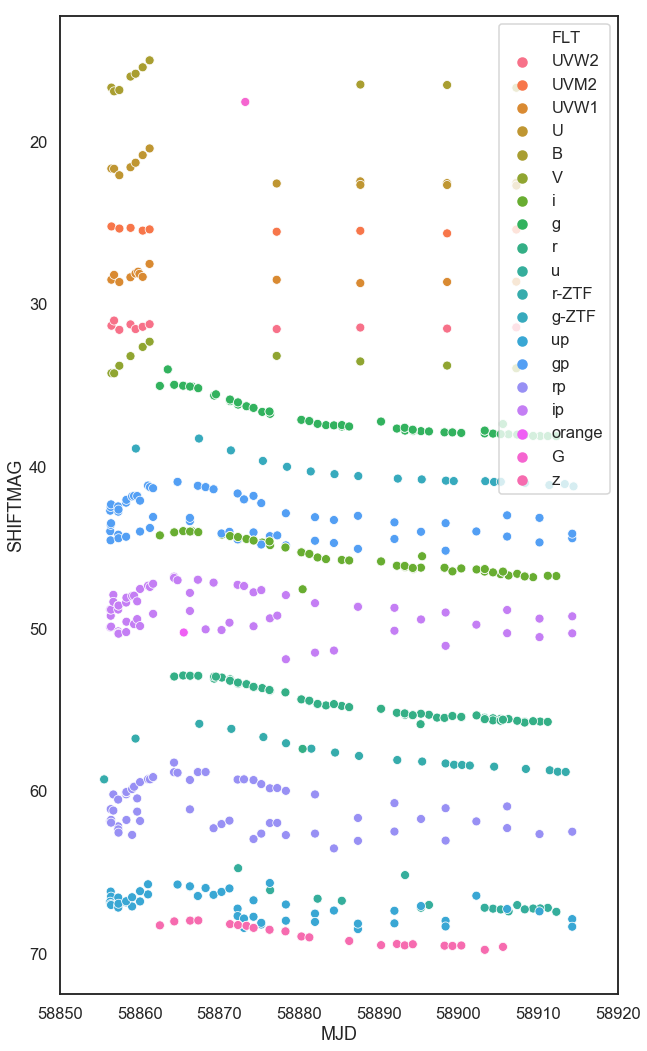

In [72]:
bands = np.unique(data['FLT'])
data['SHIFTMAG'] = data['MAG']
plt.figure(figsize=(10,18))
for i in np.arange(19):
    data.loc[data['FLT'] == bands[i], 'SHIFTMAG'] +=  3*i 
sns.scatterplot(x='MJD', y='SHIFTMAG', hue='FLT', data=data)
plt.xlim(xmin=58850, xmax=58920)
plt.gca().invert_yaxis()

How many data points were collected by a given instrument? 

In [73]:
Counter(data['TELESCOPE'])

Counter({'Swift': 67,
         'Swope': 94,
         'P48': 40,
         'Siding Spring 1m': 273,
         'ATLAS': 1,
         'Pan-STARRS1': 5,
         'Gaia': 1,
         'Nickel': 4,
         'Thacher': 186})

Up to here, we've only considered the publically released data from YSE PZ. Let's now look at the optical data that Charlie and I have been reducing with Swope templates. 

In [74]:
import os
from os import listdir
from os.path import isfile, join
from astropy.io import fits
import warnings
from astropy.utils.exceptions import AstropyUserWarning
from astropy.utils.exceptions import AstropyWarning

warnings.filterwarnings('ignore', category=AstropyUserWarning)
warnings.filterwarnings('ignore', category=AstropyWarning)

#rough position of the supernova at the center of the image, in pixels: 
#2251, 2251
XSN = 2251
YSN = 2251

timeArr = []
fixed_optical_df = []
zpts = []
zpts00 = []
path = "/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oi_swope_dcmp"
files = [f for f in listdir(path) if isfile(join(path, f))]
#get the REAL photometry:
header_list = ['Xpos','Ypos','Mag','Mag_err','flux','flux_err', 'type', 'peakflux', 'sigx', 'sigxy', 'sigy', 'sky','chisqr','class','FWHM1','FWHM2','FWHM','angle','extendedness','flag','mask','Nmask','RA','Dec','pixchk_Npos','pixchk_Nneg','pixchk_Nmask','pixchk_Ntot','pixchk_Fpos','pixchk_Fneg']
dict_vals = {}
bands = []
for file in files:
    bands.append(file[7])
    hdul = fits.open("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oi_swope_dcmp/%s"%file)
    temp = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oi_swope_dcmp/%s"%file, names=header_list, skiprows=1, delim_whitespace=True)
    sub = temp[np.abs(temp['Xpos'] - XSN) + np.abs(temp['Xpos'] - YSN)  < 3]
    sub = sub[sub['peakflux'] == np.max(sub['peakflux'].values)]
    timeArr.append(hdul[0].header['MJD-OBS'])
    zpts.append(hdul[0].header['ZPTMAGAV'])
    if hdul[0].header['ZPTMAGAV'] < 1:
        print(file)
    zpts00.append(hdul[0].header['ZPTMAG00'])
    fixed_optical_df.append(sub)

2020oi.i.ut200216.4071_stch_1_i.2020oitmpl.18.stk_1.diff.dcmp
2020oi.i.ut200120.1130_stch_1_i.2020oitmpl.18.stk_1.diff.dcmp
2020oi.r.ut200314.3141_stch_1_r.2020oitmpl.19.stk_1.diff.dcmp
2020oi.i.ut200301.8104_stch_1_i.2020oitmpl.18.stk_1.diff.dcmp
2020oi.i.ut200204.3125_stch_1_i.2020oitmpl.18.stk_1.diff.dcmp
2020oi.r.ut200303.1098_stch_1_r.2020oitmpl.19.stk_1.diff.dcmp


In [75]:
fixed_optical_df = pd.concat(fixed_optical_df, ignore_index=True)
fixed_optical_df['time'] = timeArr
fixed_optical_df['zpt_av'] = zpts
fixed_optical_df['zpt_00'] = zpts00
fixed_optical_df['TELESCOPE'] = 'Swope'
fixed_optical_df['band'] = bands

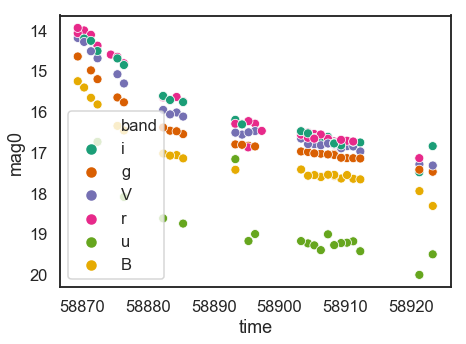

In [76]:
fixed_optical_df['mag0'] = -2.5*np.log10(fixed_optical_df['flux']) + fixed_optical_df['zpt_av']

#dropping the failed points for now
fixed_optical_df = fixed_optical_df[fixed_optical_df['mag0'] > 0]

plt.figure(figsize=(7,5))
sns.set_context("talk")
sns.scatterplot('time', 'mag0', hue='band', data=fixed_optical_df)
plt.gca().invert_yaxis()

fixed_optical_df['MJD'] = fixed_optical_df['time']
fixed_optical_df['MAG'] = fixed_optical_df['mag0']
fixed_optical_df['MAGERR'] = fixed_optical_df['Mag_err']
fixed_optical_df['FLT'] = fixed_optical_df['band']
newData = fixed_optical_df[['MJD', 'MAG', 'MAGERR', 'FLT', 'TELESCOPE']]
#newData.to_csv("2020oi_Swope_photometry.csv", index=False)

Looks a lot cleaner! How many bands do we have from the public data? 

In [77]:
data_dropSwope = data[data['TELESCOPE'] != 'Swope']

In [78]:
data_Swope = newData

In [79]:
data = pd.concat([data_Swope, data_dropSwope], ignore_index=True)

In [80]:
#scalingFactors = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/forcedPhotometry_errorScaling.csv")

In [81]:
##for band in ['g', 'r', 'i', 'z']:
 #   data.loc[[x.startswith(band) for x in data['FLT']], 'MAGERR'] *= np.median(scalingFactors.loc[scalingFactors['Band'] == band, 'f'])

In [82]:
data.loc[data['TELESCOPE'].isnull(), 'TELESCOPE'] = ''

In [83]:
np.unique(data['TELESCOPE'])

array(['ATLAS', 'Gaia', 'Nickel', 'P48', 'Pan-STARRS1',
       'Siding Spring 1m', 'Swift', 'Swope', 'Thacher'], dtype=object)

In [84]:
np.unique(data['FLT'])

array(['B', 'G', 'U', 'UVM2', 'UVW1', 'UVW2', 'V', 'g', 'g-ZTF', 'gp',
       'i', 'ip', 'orange', 'r', 'r-ZTF', 'rp', 'u', 'up', 'z'],
      dtype=object)

UVW2
UVM2
U
B
V
u
g
r
i
z


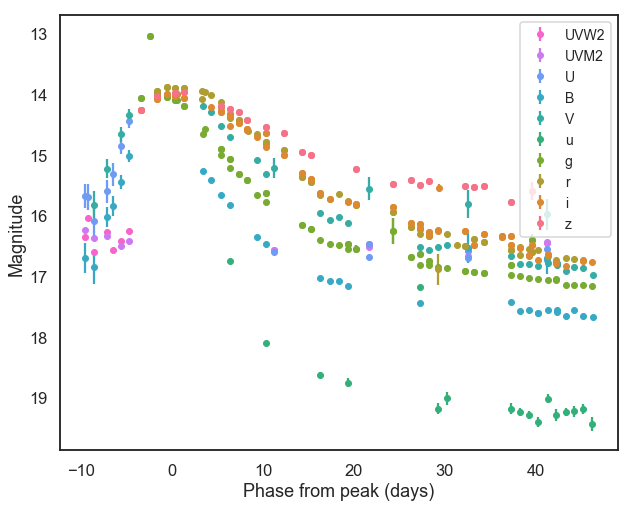

In [85]:
data = data[data['MJD'] > 58800]
data = data[data['MJD'] < 58915]

data_plt = data
#data_plt.loc[data_plt['FLT'] == 'g-ZTF', 'FLT'] = 'g'
#data_plt.loc[data_plt['FLT'] == 'gp', 'FLT'] = 'g'
#data_plt.loc[data_plt['FLT'] == 'up', 'FLT'] = 'u'
#data_plt.loc[data_plt['FLT'] == 'ip', 'FLT'] = 'i'
#data_plt.loc[data_plt['FLT'] == 'rp', 'FLT'] = 'r'
#data_plt.loc[data_plt['FLT'] == 'r-ZTF', 'FLT'] = 'r'

colors = sns.husl_palette(10)
#sns.hls_palette(8, l=.3, s=.8)
colors.reverse()
plt.figure(figsize=(10,8))
bands = ['UVW2', 'UVM2',  'U', 'B', 'V', 'u','g','r', 'i','z']
j = 0
for i in np.arange(len(bands)):
    band = bands[i]
    print(band)
    tmp = data_plt[data_plt['FLT'] == band]
    if band not in ['UVM2', 'UVW2', 'UVUU', 'UVBB', 'UVVV']:
        tmp = tmp[tmp['MAGERR'] < 0.3]
    elif band == 'u':
        tmp = tmp[~tmp['TELESCOPE'].isin(['Swope'])]
    plt.errorbar(tmp['MJD']-58866.0, tmp['MAG']+j, tmp['MAGERR'],fmt='o', c=colors[i], label=band,ms=6)
        
plt.legend(fontsize=14)
plt.gca().invert_yaxis()
plt.xlabel("Phase from peak (days)")
plt.ylabel("Magnitude")
plt.savefig("Magnitude_UVOT_phase_noSwope.png", bbox_inches='tight', dpi=300)

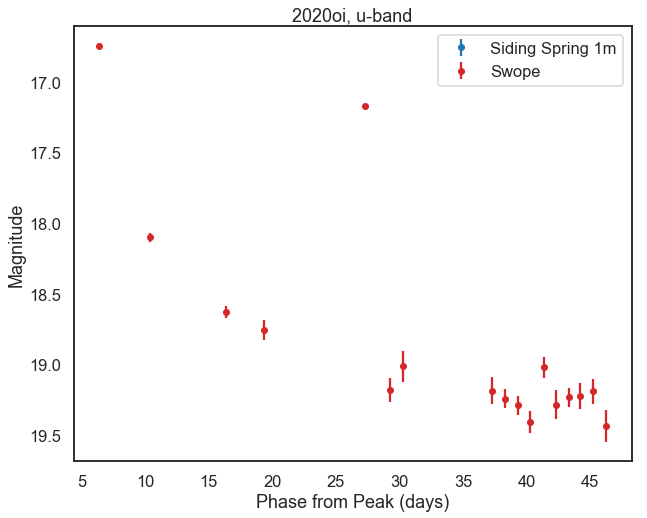

In [86]:
bands = ['u']
plt.figure(figsize=(10,8))
for i in np.arange(len(bands)):
    band = bands[i]
    tmp = data_plt[data_plt['FLT'] == band]
    if band not in ['UVM2', 'UVW2', 'UVUU', 'UVBB', 'UVVV']:
        tmp = tmp[tmp['MAGERR'] < 0.3]
        tmp_nope = tmp[~tmp['TELESCOPE'].isin(['Swope'])]
        tmp_Swope = tmp[tmp['TELESCOPE'].isin(['Swope'])]
    plt.errorbar(tmp_nope['MJD']-58866.0, tmp_nope['MAG']+j, tmp_nope['MAGERR'],fmt='o', c='tab:blue', label='Siding Spring 1m',ms=6)
    plt.errorbar(tmp_Swope['MJD']-58866.0, tmp_Swope['MAG']+j, tmp_Swope['MAGERR'],fmt='o', c='tab:red', label='Swope',ms=6)
plt.legend()
plt.title("2020oi, u-band")
plt.xlabel("Phase from Peak (days)")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

In [87]:
tmp

MJD        MAG  MAGERR FLT TELESCOPE  ULIM  FLUXCAL  FLUXCALERR  \
8    58882.32175  18.626434   0.041   u     Swope   NaN      NaN         NaN   
9    58904.32738  19.240154   0.066   u     Swope   NaN      NaN         NaN   
10   58911.20413  19.189157   0.089   u     Swope   NaN      NaN         NaN   
26   58912.27400  19.432731   0.111   u     Swope   NaN      NaN         NaN   
39   58910.25045  19.223635   0.092   u     Swope   NaN      NaN         NaN   
48   58896.29453  19.010537   0.110   u     Swope   NaN      NaN         NaN   
57   58905.29418  19.288483   0.068   u     Swope   NaN      NaN         NaN   
62   58872.35487  16.748468   0.000   u     Swope   NaN      NaN         NaN   
63   58903.27644  19.183624   0.095   u     Swope   NaN      NaN         NaN   
71   58907.36594  19.017494   0.074   u     Swope   NaN      NaN         NaN   
92   58909.36149  19.231489   0.066   u     Swope   NaN      NaN         NaN   
94   58908.31056  19.282349   0.100   u     Swope   NaN      NaN         NaN   
100  58906.28275  19.405870   0.077   u     Swope   NaN      NaN         NaN   
114  58893.29361  17.172734   0.000   u     Swope   NaN      NaN         NaN   
122  58876.36632  18.100894   0.031   u     Swope   NaN      NaN         NaN   
138  58885.35848  18.754026   0.069   u     Swope   NaN      NaN         NaN   
145  58895.28938  19.182007   0.085   u     Swope   NaN      NaN         NaN   

    MAGSYS INSTRUMENT  SHIFTMAG  
8      NaN        NaN       NaN  
9      NaN        NaN       NaN  
10     NaN        NaN       NaN  
26     NaN        NaN       NaN  
39     NaN        NaN       NaN  
48     NaN        NaN       NaN  
57     NaN        NaN       NaN  
62     NaN        NaN       NaN  
63     NaN        NaN       NaN  
71     NaN        NaN       NaN  
92     NaN        NaN       NaN  
94     NaN        NaN       NaN  
100    NaN        NaN       NaN  
114    NaN        NaN       NaN  
122    NaN        NaN       NaN  
138    NaN        NaN       NaN  
145    NaN        NaN       NaN

Text(0,0.5,'Magnitude')

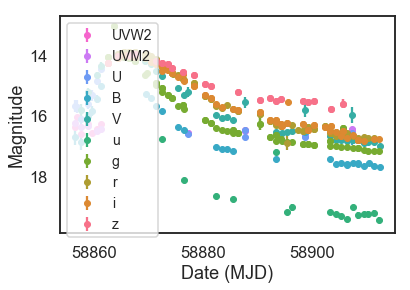

In [90]:
bands = ['UVW2', 'UVM2',  'U', 'B', 'V', 'u','g','r', 'i','z']
j = 0
for i in np.arange(len(bands)):
    band = bands[i]
    tmp = data_plt[data_plt['FLT'] == band]
    if band not in ['UVM2', 'UVW2', 'UVUU', 'UVBB', 'UVVV']:
        tmp = tmp[tmp['MAGERR'] < 0.3]
    plt.errorbar(tmp['MJD'], tmp['MAG']+j, tmp['MAGERR'],fmt='o', c=colors[i], label=band,ms=6)
        
plt.legend(fontsize=14)
plt.gca().invert_yaxis()
plt.xlabel("Date (MJD)")
plt.ylabel("Magnitude")

In [91]:
np.unique(data['FLT'])

array(['B', 'G', 'U', 'UVM2', 'UVW1', 'UVW2', 'V', 'g', 'g-ZTF', 'gp',
       'i', 'ip', 'orange', 'r', 'r-ZTF', 'rp', 'u', 'up', 'z'],
      dtype=object)

To start looking into a GP, let's first consider the r-band, which should have some of the most data. We're going to consolidate data collected in 'rp', 'r-ZTF', and 'r' band - these are instrument specific names for similar bands (is this fair game to do?). 

In [92]:
bands_list = [['rp', 'r-ZTF', 'r'], ['gp', 'g-ZTF', 'g'], ['B'], ['u', 'up'], ['U'], ['UVW2'], ['UVM2'], ['V'], ['i', 'ip']]
bands = ['rp', 'r-ZTF', 'r']

oneBand = data[data['FLT'].isin(bands)]
newData = newData[newData['FLT'].isin(bands)]
oneBand.sort_values(by=['MJD'], inplace=True)
oneBand = oneBand[oneBand['MAGERR'] < 0.13]
oneBand = oneBand[oneBand['MJD'] > 58800]

#combine online data plus newly reduced Swope photometry
oneBand = pd.concat([oneBand, newData])
#make sure our observations are unique
oneBand.drop_duplicates(subset=['MJD', 'MAG'], inplace=True)


/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


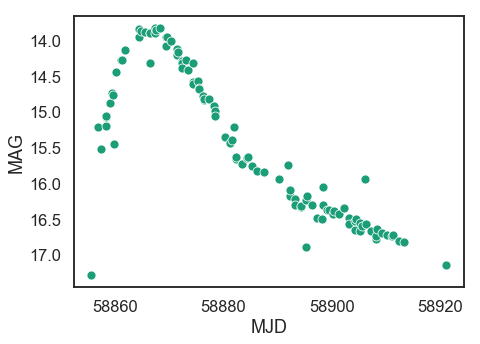

In [93]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='MJD', y='MAG',data=oneBand);
plt.gca().invert_yaxis()

When does the supernova peak in the 'r'? 

In [94]:
peakTime = oneBand.loc[oneBand['MAG'] == np.min(oneBand['MAG']), 'MJD'].values[0]

For fitting, we now separate into rise, peak, and fall components of the supernova lightcurve. 

In [95]:
#get the points with lowest error
oneBand.sort_values(by=['MJD'], inplace=True)
rise = oneBand[oneBand['MJD'] < peakTime]
peak = oneBand[np.abs(oneBand['MJD'] - peakTime) < 0.2]
fall = oneBand[oneBand['MJD'] > peakTime]

In [96]:
plt.figure(figsize=(7,5))
plt.plot(rise['MJD'], rise['MAG'], '.')
plt.scatter(peak['MJD'], peak['MAG'], marker='*', s=400, zorder=100, c='r')
plt.plot(fall['MJD'], fall['MAG'], '.')
plt.xlabel("MJD")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

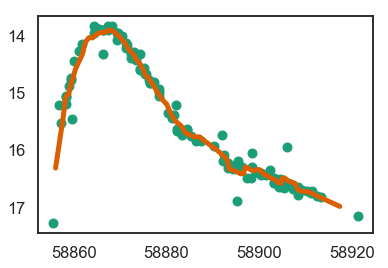

In [97]:
from scipy.signal import savgol_filter
xhat, yhat = savgol_filter((oneBand['MJD'], oneBand['MAG']), 7, 1) # window size 51, polynomial order 3
plt.plot(oneBand['MJD'], oneBand['MAG'], 'o')
plt.plot(xhat, yhat, lw=5)
plt.gca().invert_yaxis()

In [98]:
from scipy.interpolate import interp1d

def fit(x, vec):
    if len(oneBand['MJD']) > 5:
        xhat, yhat = savgol_filter((oneBand['MJD'], oneBand['MAG']), int(vec[0]), int(vec[1])) # window size 51, polynomial order 3
        fit = 'quadratic'
    else:
        xhat = oneBand['MJD']
        yhat = oneBand['MAG']
        fit = 'linear'
    f = interp1d(xhat, yhat, kind=fit, fill_value='extrapolate')
    #ynew = f(x)
    #return ynew
    return f

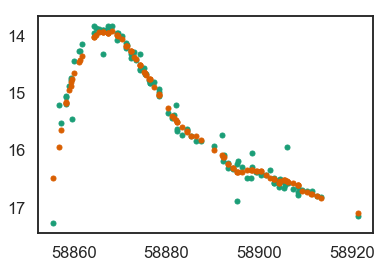

In [99]:
#plt.plot(xnew, ynew, 'o', markersize=3)
f = fit(oneBand['MJD'], [9, 1])
plt.plot(oneBand['MJD'], oneBand['MAG'], 'o', markersize=5)
plt.plot(oneBand['MJD'], f(oneBand['MJD']), 'o', markersize=5)
plt.gca().invert_yaxis()

And, fitting both the rise and decline: 

A pretty good fit! This will serve as our mean model for this data - we'll now use George to create a gaussian process to fit the data a little more closely. 

In [100]:
import george
from george.modeling import Model
from scipy import interpolate

class MeanModel(Model):
    parameter_names = ('scale', 'shift')
    def get_parameter_vector(self):
        return np.array([self.scale, self.shift])
    def set_vector(self, vec):
        self.scale = vec[0]
        self.shift = vec[1]
    def set_parameter_vector(self, vec): 
        return set_vector(self, vec)
    def get_value(self, time):
        ynew = float(self.scale)*f(time) + float(self.shift)
        return ynew

In [101]:
#our starting vector will be composed of the best-fit values for the rise and the decline
p0 = [1.0, 0.0]

In [102]:
def lnprob(p):
    #let's make them all flat priors - 
    logBoundL = np.array([1., -2])
    logBoundR = np.array([5.0, 2])
    
    for i in np.arange(2):
        if (p[i] <= logBoundL[i]) or (p[i] >= logBoundR[i]):
            return -np.inf
    # Update the kernel and compute the lnlikelihood.
    gp.set_parameter_vector(p)
    return gp.lnlikelihood(oneBand['MAG'], quiet=True)

In [103]:
import scipy.optimize as op
from george import kernels

kernel = kernels.ExpSquaredKernel(10.)

#gp = george.GP(white_noise=np.log(0.19**2), fit_white_noise=True, mean=MeanModel(width=9, order=1), kernel=kernel)
gp = george.GP(white_noise=np.log(0.19**2), fit_white_noise=True, mean=MeanModel(scale=1.0, shift=0), kernel=kernel)

# Define the objective function (negative log-likelihood in this case).
def nll(p):
    gp.set_parameter_vector(p)
    ll = gp.log_likelihood(oneBand['MAG'].values, quiet=True)
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(oneBand['MAG'].values, quiet=True)

# You need to compute the GP once before starting the optimization.
gp.compute(oneBand['MJD'].values, oneBand['MAGERR'].values)

# Run the optimization routine.
p0 = gp.get_parameter_vector()
results = op.minimize(nll, p0, jac=grad_nll, method="L-BFGS-B")

# Update the kernel and print the final log-likelihood.
gp.set_parameter_vector(results.x)

ypred2, cov = gp.predict(oneBand['MAG'], oneBand['MJD'], return_cov=True)
std = np.sqrt(np.diag(cov))

# plot the data
plt.figure(figsize=(7,5))
plt.fill_between(oneBand['MJD'].values-peakTime, ypred2+std, ypred2-std, color="g", lw=3, alpha=0.5, label='conditioned GP', zorder=100)
newTime = np.linspace(58857, 58930,num=100)
plt.errorbar(oneBand['MJD'].values-peakTime, oneBand['MAG'].values, oneBand['MAGERR'].values,fmt='o', label='photometry')
plt.plot(newTime-peakTime, f(newTime), '--',label='Mean Model');
#plt.plot(rise['MJD'].values, rise['MAG'].values, 'o', label='Rise Data');
#plt.plot(fall['MJD'].values, fall['MAG'].values, 'o', label='Decline Data');
#plt.plot(peak['MJD'].values, peak['MAG'].values, '*', markersize=20, zorder=100, label='Peak');
plt.gca().invert_yaxis()
plt.xlabel("Time since peak (days)")
plt.ylabel("Magnitude")
plt.legend(loc='upper right');
plt.title("2020oi, $r$-band George GP")
plt.savefig("George_GP_Alex_new.png", bbox_inches='tight')

In [104]:
bands_list = [['rp', 'r-ZTF', 'r'], ['gp', 'g-ZTF', 'g'], ['B'], ['u', 'up'], ['U'], ['UVW2'], ['UVM2'], ['V'], ['i', 'ip']]
newbands_list = bands_list[:]
cleaned_data = []
bands_idx = []
for i in np.arange(len(bands_list)):
    bands = bands_list[i]
    oneBand = data[data['FLT'].isin(bands)]
    newData = newData[newData['FLT'].isin(bands)]
    oneBand.sort_values(by=['MJD'], inplace=True)
    #oneBand = oneBand[oneBand['MAGERR'] < 0.3]
    if i == 1:
        oneBand = oneBand[oneBand['MJD'] != 58874.282] #remove outlier from dataset
    if bands == ['UVW2'] or bands == ['UVM2'] or bands == ['U'] or bands == ['B'] or bands == ['V']:
        print("saved")
    elif bands != ['u', 'up']:
        oneBand = oneBand[oneBand['MAGERR'] < 0.1]
    else:
        oneBand = oneBand[oneBand['MAGERR'] < 0.1]
    #if bands == ['UVW2'] or bands == ['UVM2']:
       # oneBand['MAGERR'] *= 10
#        oneBand = oneBand[oneBand['MAGERR'] < 0.03]
    oneBand = oneBand[oneBand['MJD'] > 58800]

    #combine online data plus newly reduced Swope photometry
    oneBand = pd.concat([oneBand, newData], ignore_index=True)
    #make sure our observations are unique
    oneBand.dropna(subset=['MAG', 'MAGERR', 'MJD'], inplace=True)
    oneBand.drop_duplicates(subset=['MJD', 'MAG'], inplace=True)
    
    #only use if we have enough points for the fitting: 
    if len(oneBand) > 1:
        bands_idx.append(np.ones(len(oneBand))*i)
        cleaned_data.append(oneBand)
    else:
        newbands_list.remove(bands)
bands_idx = np.concatenate(bands_idx)
cleaned_df = pd.concat(cleaned_data, ignore_index=True)
bands_list = newbands_list

saved
saved
saved
saved
saved


/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Which bands are left after this culling? 

In [105]:
bands_list

[['rp', 'r-ZTF', 'r'],
 ['gp', 'g-ZTF', 'g'],
 ['B'],
 ['u', 'up'],
 ['U'],
 ['UVW2'],
 ['UVM2'],
 ['V'],
 ['i', 'ip']]

Finally, we construct our hierarchical gaussian process model: 

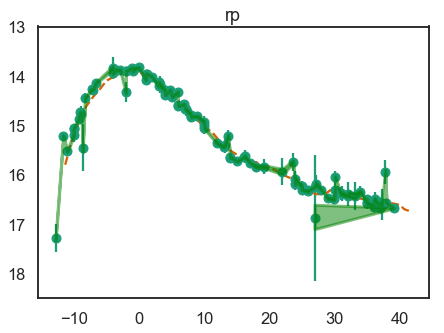

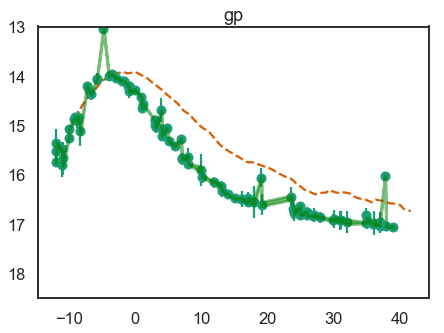

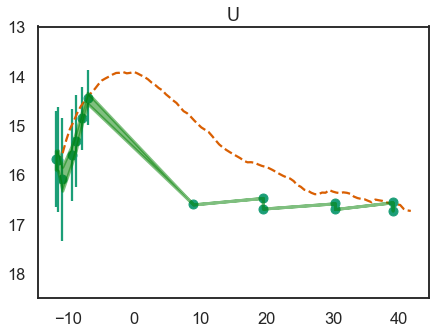

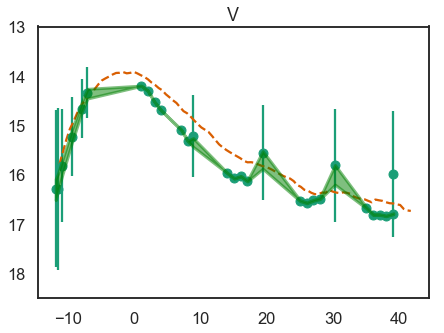

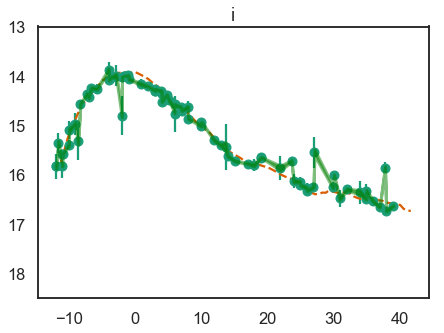

In [106]:
import scipy.optimize as op
from george import kernels

for i in np.arange(len(bands_list)):
    
    oneBand = cleaned_data[i]
    oneBand = oneBand[oneBand['MJD'] < peakTime+40]
    if bands_list[i] == ['u', 'up']:
        kernel = kernels.ExpSquaredKernel(1000000.)
        gp = george.GP(white_noise=np.log(0.19**2), fit_white_noise=True, mean=MeanModel(scale=1, shift=0), kernel=kernel)
    else:
        kernel = kernels.ExpSquaredKernel(1000.)
        gp = george.GP(mean=MeanModel(scale=1, shift=1), kernel=kernel)

    # You need to compute the GP once before starting the optimization.
    gp.compute(oneBand['MJD'].values, oneBand['MAGERR'].values)

    # Run the optimization routine.
    p0 = gp.get_parameter_vector()
    results = op.minimize(nll, p0, jac=grad_nll, method="L-BFGS-B")

    # Update the kernel and print the final log-likelihood.
    gp.set_parameter_vector(results.x)

    ypred2, cov = gp.predict(oneBand['MAG'], oneBand['MJD'], return_cov=True)
    std = np.sqrt(np.diag(cov))

    # plot the data
    plt.figure(figsize=(7,5))
    plt.title("%s"%bands_list[i][0])
    plt.fill_between(oneBand['MJD'].values-peakTime, ypred2+std, ypred2-std, color="g", lw=3, alpha=0.5, label='conditioned GP', zorder=100)
    newTime = np.linspace(58857, 58910,num=100)
    plt.errorbar(oneBand['MJD'].values-peakTime, oneBand['MAG'].values, 5*oneBand['MAGERR'].values,fmt='o', label='both limits (default)')
    plt.plot(newTime-peakTime, f(newTime), '--',label='Mean Model');
    plt.gca().invert_yaxis()
    plt.ylim((18.5, 13.))
    #plt.xlabel("Time since peak (days)")
    #plt.ylabel("Magnitude")
    #plt.legend(loc='upper right');
    #plt.title("2020oi, $r$-band George GP")
    #plt.savefig("George_GP_Alex.png", bbox_inches='tight')

Let's predict on new data - but we need to make sure we make the new data specific to the bands - if we try to predict far outside of the data ranges for a band, we could run into trouble.

These fits are looking pretty good, but unfortunately if we're going to use this data for bolometric fitting, we need to evaluate all our bands along the same xgrid: 

['rp', 'r-ZTF', 'r']
[ 1.0131244  -0.21850713 -3.62356832 27.52431215]
['gp', 'g-ZTF', 'g']
[ 0.58254697  7.06753182 -3.01511132  4.7242741 ]
['B']
[ 1.04255417  0.44753615 -7.83037519  3.70541585]
['u', 'up']
[ 0.71457314  5.92002695 -1.29750951  4.22384812]
['U']
[ 0.48654592  8.48464629 -4.43574937  1.77752579]
['UVW2']
[-0.02505896 16.8051826  -3.63034687 11.7246608 ]
['UVM2']
[-0.09580603 17.67024434 -5.02888677  9.49877782]
['V']
[ 1.28131758 -4.38711307 -5.6595989   5.60198336]
['i', 'ip']
[ 0.90624238  1.4254154  -3.21471945 28.6761991 ]


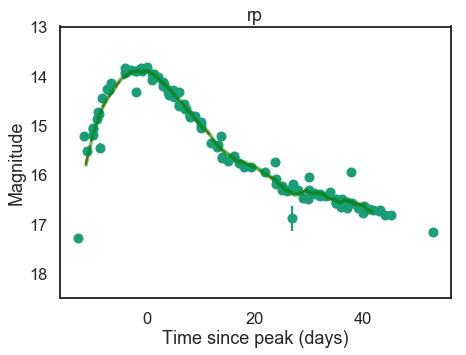

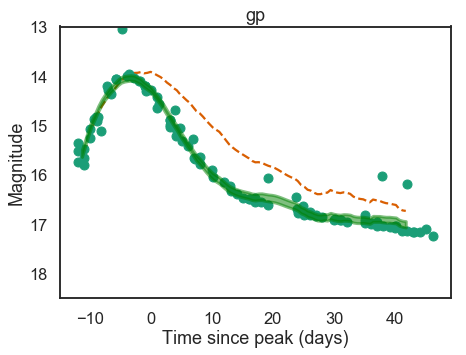

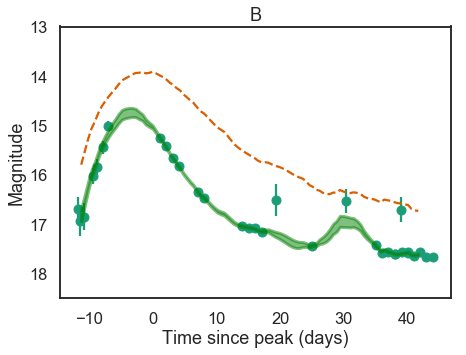

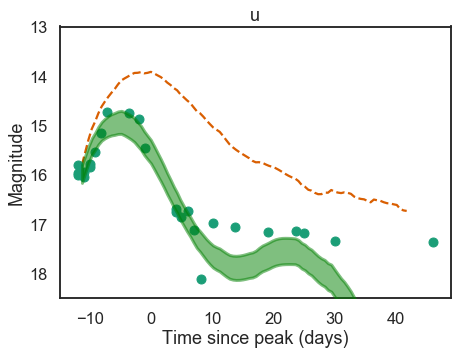

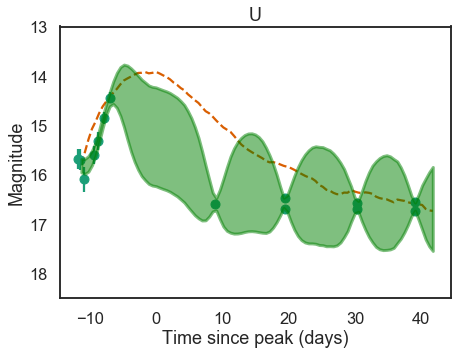

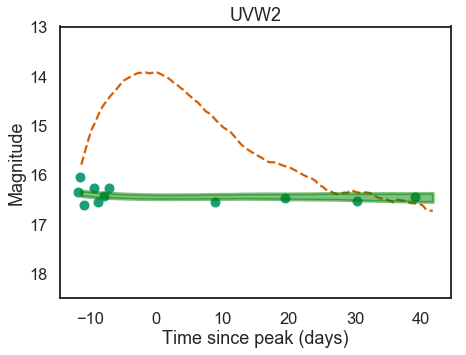

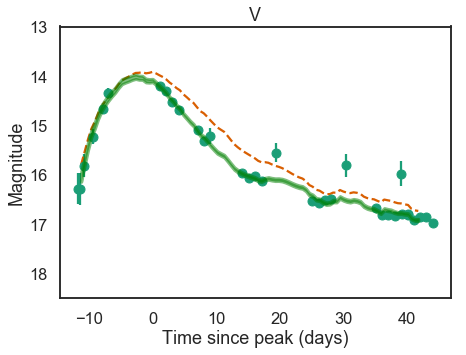

In [107]:
import scipy.optimize as op
from george import kernels

ypreds = []
ystd = []
for i in np.arange(len(bands_list)):
    print(bands_list[i])
    oneBand = cleaned_data[i]
  #  oneBand = oneBand[oneBand['MJD'] < peakTime+40]
    if bands_list[i] == ['u', 'up']:
        kernel = kernels.ExpSquaredKernel(1000000.)
       # kernel =  2.0 * kernels.Matern32Kernel(5.0)
        gp = george.GP(white_noise=np.log(0.5**2), fit_white_noise=True, mean=MeanModel(scale=1.0, shift=0.0), kernel=kernel)

    else:
       # kernel =  2.0 * kernels.Matern32Kernel(5.0)
        kernel = kernels.ExpSquaredKernel(100.)
        gp = george.GP(white_noise=np.log(1.5**2), fit_white_noise=True, mean=MeanModel(scale=1.0, shift=0.0), kernel=kernel)

    # You need to compute the GP once before starting the optimization.
    gp.compute(oneBand['MJD'].values, oneBand['MAGERR'].values)

    # You need to compute the GP once before starting the optimization.
    #gp.compute(oneBand['MJD'].values, 50*oneBand['MAGERR'].values)

    # Run the optimization routine.
    p0 = gp.get_parameter_vector()
    results = op.minimize(nll, p0, jac=grad_nll, method="L-BFGS-B")
    print(results.x)
    # Update the kernel and print the final log-likelihood.
    gp.set_parameter_vector(results.x)

    # plot the data
    plt.figure(figsize=(7,5))
    newTime = np.linspace(58857, 58910,num=100)
    ypred2, cov = gp.predict(y=oneBand['MAG'], t=newTime, return_cov=True)
    std = np.sqrt(np.diag(cov))
    ypreds.append(ypred2)
    ystd.append(std)
    plt.fill_between(newTime-peakTime, ypred2+std, ypred2-std, color="g", lw=3, alpha=0.5, label='conditioned GP', zorder=100)
    plt.errorbar(oneBand['MJD'].values-peakTime, oneBand['MAG'].values, oneBand['MAGERR'].values,fmt='o', label='both limits (default)')
    plt.plot(newTime-peakTime, f(newTime), '--',label='Mean Model');
    plt.title("%s"%bands_list[i][0])
    plt.gca().invert_yaxis() #1994I
    plt.ylim((18.5, 13.))
    plt.xlabel("Time since peak (days)")
    plt.ylabel("Magnitude")
    #plt.legend(loc='upper right');
    #plt.title("2020oi, $r$-band George GP")
    plt.savefig("George_GP_Alex_%s.png"%bands_list[i][0], bbox_inches='tight')

['rp', 'r-ZTF', 'r']


['gp', 'g-ZTF', 'g']


['B']


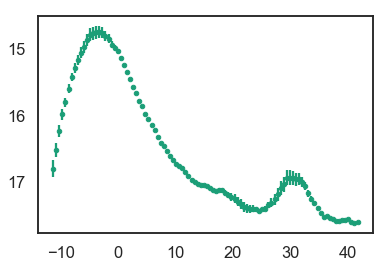

['u', 'up']


['U']


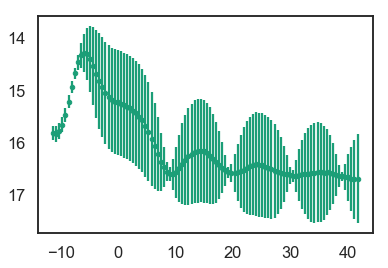

['UVW2']


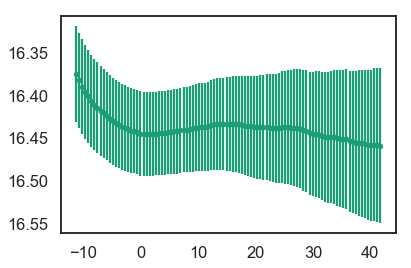

['UVM2']


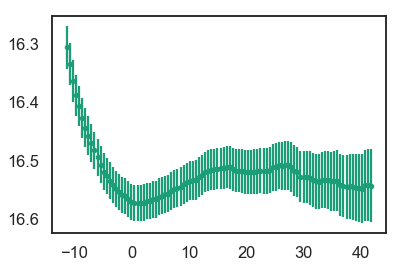

['V']


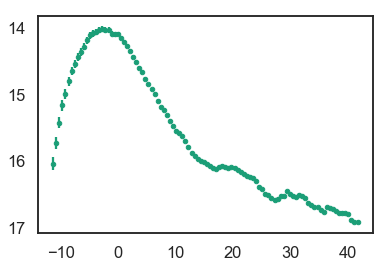

['i', 'ip']


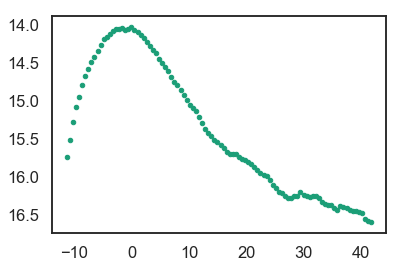

In [108]:
#say these are okay for now - take the medians, zero out where the ranges are bad
for i in np.arange(9):
    print(bands_list[i])
    ypreds[i] = np.array(ypreds[i])
   # if i == 4:
   #     idxs = (newTime > 58857.6) | (newTime < 58856.3)
   #     ypreds[i][idxs] = 20. 
    #elif i == 7:
    #    idxs = newTime < peakTime
    #    ypreds[i][idxs] = 16.   
    plt.errorbar(newTime-peakTime, ypreds[i], ystd[i], fmt='.')
    plt.gca().invert_yaxis()
    plt.show()
    
gpLC_r = ypreds[0]
gpLC_g = ypreds[1]
gpLC_B = ypreds[2]
gpLC_u = ypreds[3]
gpLC_U = ypreds[4]
gpLC_UVW2 = ypreds[5]
gpLC_UVM2 = ypreds[6]
gpLC_V = ypreds[7]
gpLC_i = ypreds[8]

gpLCr_std = ystd[0]
gpLCg_std = ystd[1]
gpLCB_std = ystd[2]
gpLCu_std = ystd[3]
gpLCU_std = ystd[4]
gpLCUVW2_std = ystd[5]
gpLCUVM2_std = ystd[6]
gpLCV_std = ystd[7]
gpLCi_std = ystd[8]

As we expected, the fits are a bit worse outside of their ranges, but I think they're the best we're going to get. Taking the median posteriors as our predicted lightcurves in each band: 

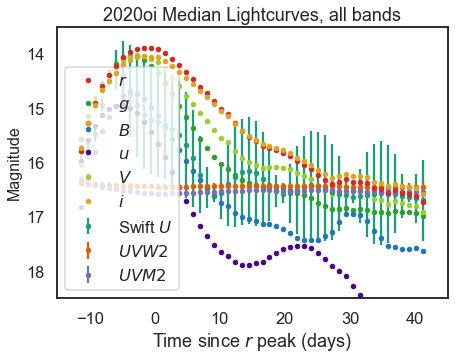

In [109]:
# plot the results
fig = plt.figure(figsize=(7,5)); ax = fig.gca()

bol_std = np.sqrt(gpLCr_std/gpLC_r**2 + gpLCUVW2_std/gpLC_UVW2**2 + gpLCUVM2_std/gpLC_UVM2**2 +gpLCg_std/gpLC_g**2 + gpLCB_std/gpLC_B**2 + gpLCV_std/gpLC_V**2 + gpLCi_std/gpLC_i**2 + gpLCU_std/gpLC_U**2)

#['r', 'g', 'B', 'u', 'V', 'i']
plt.plot(newTime[::2]-peakTime, gpLC_r[::2], '.', label=r'$r$', color='tab:red', zorder=100)
plt.plot(newTime[::2]-peakTime, gpLC_g[::2], '.', label=r'$g$', color='tab:green')
plt.plot(newTime[::2]-peakTime, gpLC_B[::2], '.', label=r'$B$', color='tab:blue')
plt.plot(newTime[::2]-peakTime, gpLC_u[::2], '.', label=r'$u$', color='indigo')
plt.errorbar(newTime[::2]-peakTime, gpLC_U[::2], yerr=gpLCU_std[::2], fmt='.', label=r'Swift $U$')
plt.errorbar(newTime[::2]-peakTime, gpLC_UVW2[::2], yerr=gpLCUVW2_std[::2], fmt='.', label=r'$UVW2$')
plt.errorbar(newTime[::2]-peakTime, gpLC_UVM2[::2], yerr=gpLCUVM2_std[::2], fmt='.', label=r'$UVM2$')
plt.plot(newTime[::2]-peakTime, gpLC_V[::2], '.', label=r'$V$', color='yellowgreen')
plt.plot(newTime[::2]-peakTime, gpLC_i[::2], '.', label=r'$i$', color='goldenrod', zorder=200)

plt.xlabel(r"Time since $r$ peak (days)")
plt.ylabel("Magnitude",fontsize=16)
plt.title("2020oi Median Lightcurves, all bands")
plt.gca().invert_yaxis()
plt.xlim((-15, 45))
plt.ylim((18.5, 13.5))
plt.legend()
plt.savefig("PyMC3_MedianLCs_Alex_allnewSwift.png", bbox_inches='tight', dpi=300)

Cool, the hard part is behind us now. We can convert our interpolated magnitudes to normalized flux, apply flux corrections to flux in each band, and use a trapezoidal interpolation method to get the bolometric lightcurve:

In [149]:
#wavelengths are the centers of each band
wavelengths = np.array([6260, 4830, 4380, 3560, 3600, 2030, 2231, 5450, 7670]) #in Angstroms
c = 3e18 #speed of light, in angstroms/s
#r g B u U UVW2 UVM2 V i
#swift U 3600
#swift S=UVW2 = 2030
#swift D=UVM2 = 2231

bol = []
fluxes_arr = []
magserr_arr = []
for i in np.arange(len(newTime)):
    mags = np.array([gpLC_r[i], gpLC_g[i], gpLC_B[i], gpLC_u[i], gpLC_U[i], gpLC_UVW2[i], gpLC_UVM2[i], gpLC_V[i], gpLC_i[i]])
    magserr = np.array([gpLCr_std[i], gpLCg_std[i], gpLCB_std[i], gpLCu_std[i], gpLCU_std[i], gpLCUVW2_std[i], gpLCUVM2_std[i], gpLCV_std[i], gpLCi_std[i]])
    magserr_arr.append(magserr)
    fluxes = 10**((-mags)/2.5) # normalized flux units - do we need to apply the zeropoint??
    fluxes[0] *= 278.0 * 1.e-11  #r correction
    fluxes[1] *= 466.9 * 1.e-11 #g correction
    fluxes[2] *= 632.0 * 1.e-11 #ergs cm^-2 s^-1 Angstroms^-1 #B correction
    fluxes[3] *= 859.5 * 1.e-11  #u correction
    fluxes[4] *= 417.5 * 1.e-11  #ergs cm^-2 s^-1 Angstroms^-1# Ucorrection
    fluxes[5] *= 536.2 * 1.e-11 #UVW2 correction
    fluxes[6] *= 463.7 * 1.e-11 #UVM2 correction
    fluxes[7] *= 363.1 * 1.e-11 #V correction
    fluxes[8] *= 185.2 * 1.e-11 #i correction
    #get B in there! 
    fluxes_arr.append(fluxes)
    bol.append(np.trapz(fluxes[np.argsort(wavelengths)], wavelengths[np.argsort(wavelengths)]))

Let's plot it and see how we did. Here we need to convert from bolometric flux to bolometric luminosity, which we can do using the equation: 

$$ L_{bol} = F_{bol}  4 \pi d_{SN}^2$$

Where $d_{SN}$ is the distance to the supernova. SIMBAD gives a host redshift of 0.005251, corresponding to a luminosity distance of 22.7 Mpc, or 7.004e25 cm, so we'll use that. 

Our flux estimate is: 

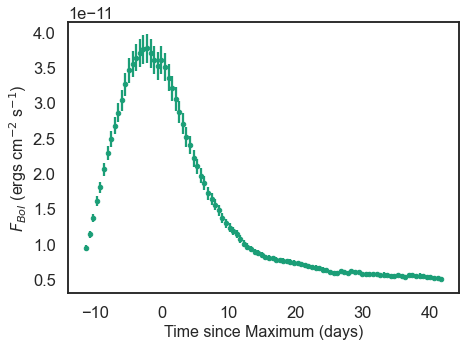

In [150]:
fig = plt.figure(figsize=(7,5)); 
ax = fig.gca()
bol_lum = np.array(bol) #ergs cm^-2 s^-1

# z~ 0.005251 corresponds to a distance of 22.7 Mpc
#error on the flux is roughly the fraction on the flux (and, consequently, the luminosity)
plt.errorbar(newTime-peakTime, bol_lum, yerr=bol_std*bol_lum, fmt='.')
plt.xlabel("Time since Maximum (days)",fontsize=16);
plt.ylabel(r"$F_{Bol}$ (ergs cm$^{-2}$ s$^{-1}$)",fontsize=16);

And our bolometric lightcurve is: 

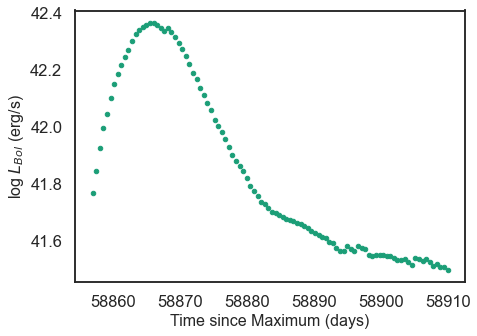

In [151]:
fig = plt.figure(figsize=(7,5)); 
ax = fig.gca()
bol_lum = np.array(bol) * 4 * np.pi * (7.004e25)**2 #ergs cm^-2 s^-1
#bol_lum = np.array(bol) * 4 * np.pi * (7.19e25)**2 #ergs cm^-2 s^-1, from superbol

# z~ 0.005251 corresponds to a distance of 22.7 Mpc
plt.errorbar(newTime, np.log10(bol_lum), fmt='.')
#plt.yscale("log")
plt.xlabel("Time since Maximum (days)",fontsize=16);
plt.ylabel(r"log $L_{Bol}$ (erg/s)",fontsize=16);

Let's get a rough estimate for the temperature with stefan-boltzmann, assuming a stellar radius of R~1.e15 cm (we are dealing with a massive star, after all). 

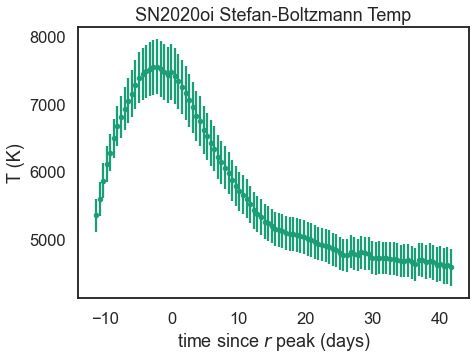

In [152]:
# Getting the temperature (using stefan-boltzmann, assuming R = 1.e15 cm)
fig = plt.figure(figsize=(7,5)); 
sigma =  5.6704e-5# erg⋅cm−2⋅s−1⋅K−4
sb_temp = (bol_lum/(4 * np.pi * (1.e15)**2 * sigma))**(1./4)
plt.errorbar(newTime-peakTime, sb_temp, yerr=bol_std*sb_temp, fmt='.')
plt.xlabel("time since $r$ peak (days)")
plt.ylabel("T (K)")
plt.title("SN2020oi Stefan-Boltzmann Temp")
plt.savefig("sb_Temp_Alex_newSwift.png", bbox_inches='tight')

# Getting the data ready for superbol:

In [160]:
df_forsuperbol = pd.DataFrame({'MJD':newTime.T, 'umag':gpLC_U, 'umagerr': gpLCU_std, 'gmag':gpLC_g, 'gmagerr':gpLCg_std, 'rmag': gpLC_r, 'rmagerr': gpLCr_std, 'imag':gpLC_i, 'imagerr': gpLCi_std})

In [161]:
df_forsuperbol.to_csv("../data/2020oi_ugri_Giacomo.txt", index=False)

In [162]:
df_forsuperbolUBVSD = pd.DataFrame({'MJD':newTime.T, 'Umag':gpLC_U, 'Umagerr':gpLCU_std, 'Bmag':gpLC_B, 'Bmagerr': gpLCB_std, 'Vmag':gpLC_V, 'Vmagerr':gpLCV_std, 'Smag':gpLC_UVW2, 'Smagerr':gpLCUVW2_std, 'Dmag':gpLC_UVM2, 'Dmagerr':gpLCUVM2_std})

In [163]:
df_forsuperbolUBV = pd.DataFrame({'MJD':newTime.T, 'Umag':gpLC_U, 'Umagerr':gpLCU_std, 'Bmag':gpLC_B, 'Bmagerr': gpLCB_std, 'Vmag':gpLC_V, 'Vmagerr':gpLCV_std})

In [164]:
df_forsuperbolUBV.to_csv("../data/2020oi_UBV_Giacomo.txt", index=False)

In [165]:
df_forsuperbolUBVSD.to_csv("../data/2020oi_UBVSD_Giacomo.txt", index=False)

In [159]:
#and, assuming the sodium doublet line width is 0.88, we get: 
#log10(EB−V) =1.17*EW−1.85#±0.08
log10_EBV = 1.17*0.88-1.85
EBV = 10**(log10_EBV)
print(EBV)
#redshift of 2020oi is 0.0052

0.15121678487917664


## peakTime

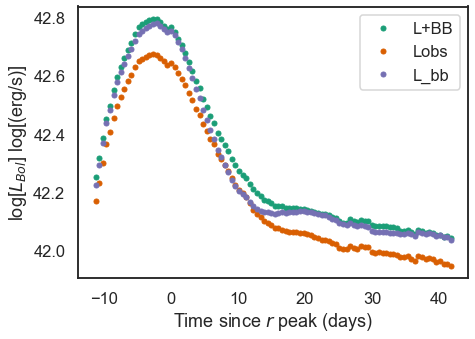

In [188]:
sbol_2020oi = pd.read_csv("../data/bol_2020oi_SDuUBgVri.txt", delimiter='\t')
L_from_bbody_2020oi = pd.read_csv("../data/BB_params_2020oi_SDuUBgVri.txt", delimiter='\t')
#print(L_from_bbody_2020oi['ph'])
# z~ 0.005251 corresponds to a distance of 22.7 Mpc #Superbol uses 23.3 Mpc!! 
fig = plt.figure(figsize=(7,5)); 

#plt.semilogy(X_new-peakTime, bol_lum, label='Trapezoidal Integration, gps')
#plt.semilogy(sbol_2020oi['ph']-peakTime, sbol_2020oi['Lobs'], '--', label='Superbol fit')
#plt.semilogy(sbol_2020oi['ph']-peakTime, sbol_2020oi['L+BB'], ':', label='Superbol with BB-correction')
#plt.errorbar(sbol_2020oi['ph']-peakTime, np.log10(sbol_2020oi['L+BB']), yerr=0.001, fmt='.')
#plt.errorbar(sbol_2020oi['ph']-peakTime, sbol_2020oi['L+BB'], yerr=0.5*sbol_2020oi['err.1'], fmt='.')

plt.plot(sbol_2020oi['ph']-peakTime, np.log10(sbol_2020oi['L+BB']), 'o', markersize=5, label='L+BB')
plt.plot(sbol_2020oi['ph']-peakTime, np.log10(sbol_2020oi['Lobs']), 'o', markersize=5, label='Lobs')
plt.plot(L_from_bbody_2020oi['ph']-peakTime, np.log10(L_from_bbody_2020oi['L_bb']), 'o', markersize=5, label='L_bb')
#plt.axvline(x=58866.1)
#plt.errorbar(sbol_2020oi['ph']-peakTime, sbol_2020oi['Lobs'], yerr=sbol_2020oi['err'], fmt='.', label='Superbol fit')
#plt.errorbar(BBparams_superbol['ph']-peakTime, BBparams_superbol['L_bb'], yerr=BBparams_superbol['err.2'], fmt='.', label=r'Stefan-Boltzmann');
#plt.errorbar(newTime-peakTime, bol_lum, yerr=bol_std*bol_lum, fmt='.', label='Trapezoidal Integration, gps')
#plt.yscale("log")
plt.xlabel(r"Time since $r$ peak (days)");
plt.ylabel(r"log[$L_{Bol}$] log[(erg/s)]");
#plt.title("2020oi Bolometric Lightcurve, BB & E(B-V)-Corrected")
plt.legend();
#plt.savefig("2020oi_Bolometric_Corrected_noSwift_logspace.png", bbox_inches='tight', dpi=300)

In [168]:
test = sbol_2020oi['Lobs'].values[2:]
np.where(test == np.nanmax(test))

(array([14, 15]),)

In [169]:
print(sbol_2020oi['ph'].values[17])
#print(sbol_2020oi['ph'].values[17])

58866.1


In [72]:
# from Luca: 
# 11500 (+- 500)  km/s is photospheric velocity at radius

In [170]:
print(sbol_2020oi['Lobs'].values[19])
print(sbol_2020oi['Lobs'].values[17])


2.78e+42
2.9300000000000004e+42


In [181]:
BBparams_superbol = pd.read_csv("../data/BB_params_2020oi_SDuUBgVri.txt", delimiter='\t')

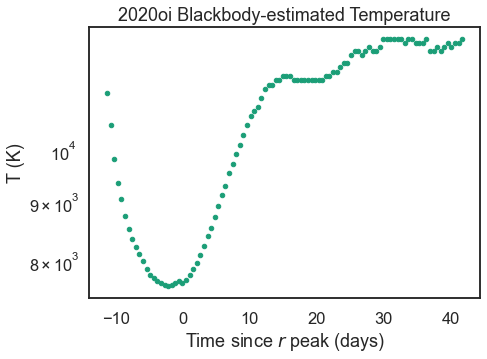

In [182]:
plt.figure(figsize=(7,5))
#plt.errorbar(BBparams_superbol['ph']-peakTime, BBparams_superbol['T_bb'], yerr=BBparams_superbol['err'], fmt='.', label=r'Superbol');
plt.plot(BBparams_superbol['ph']-peakTime, BBparams_superbol['T_bb'], '.', label=r'Superbol');
plt.xlabel(r"Time since $r$ peak (days)")
plt.ylabel(r"T (K)")
plt.yscale("log")
plt.title("2020oi Blackbody-estimated Temperature")
#plt.legend()
plt.savefig("Temp_vs_MJD_superbol_new.png", bbox_inches='tight',dpi=300)

In [183]:
plt.figure(figsize=(7,5))
plt.plot(BBparams_superbol['ph']-peakTime, BBparams_superbol['R_bb'], '.', label=r'Superbol');
plt.yscale("log")
#plt.errorbar(sbol_2020oi['ph']-peakTime, R, yerr=Rerr, fmt='.', label=r'Gaussian Process');
plt.xlabel(r"Time since $r$ peak (days)")
plt.ylabel(r"R (cm)")
#plt.legend()
plt.title("2020oi Blackbody-estimated Radius")
plt.savefig("Radius_vs_MJD_superbol_new.png", bbox_inches='tight', dpi=300)

In [53]:
def bbody(lam,T,R):
    '''
    Calculate the corresponding blackbody radiance for a set
    of wavelengths given a temperature and radiance.

    Parameters
    ---------------
    lam: Reference wavelengths in Angstroms
    T:   Temperature in Kelvin
    R:   Radius in cm

    Output
    ---------------
    Spectral radiance in units of erg/s/Angstrom

    (calculation and constants checked by Sebastian Gomez)
    '''

    # Planck Constant in cm^2 * g / s
    h = 6.62607E-27
    # Speed of light in cm/s
    c = 2.99792458E10

    # Convert wavelength to cm
    lam_cm = lam * 1E-8

    # Boltzmann Constant in cm^2 * g / s^2 / K
    k_B = 1.38064852E-16

    # Calculate Radiance B_lam, in units of (erg / s) / cm ^ 2 / cm
    exponential = (h * c) / (lam_cm * k_B * T)
    B_lam = ((2 * np.pi * h * c ** 2) / (lam_cm ** 5)) / (np.exp(exponential) - 1)

    # Multiply by the surface area
    A = 4*np.pi*R**2

    # Output radiance in units of (erg / s) / Angstrom
    Radiance = B_lam * A / 1E8

    return Radiance

In [54]:
len(BBparams_superbol['R_bb'].values)

100

In [63]:
#print(BBparams_superbol['ph']) 
lam = np.linspace(3000, 8000, num=100)
flux = []
for i in np.arange(len(BBparams_superbol['T_bb'].values)):
    tempRad = BBparams_superbol.loc[i, 'R_bb']
    tempTemp = BBparams_superbol.loc[i, 'T_bb']
    flux.append(bbody(lam,tempTemp,tempRad))
time = np.array(BBparams_superbol['ph'])
X, Y = np.meshgrid(lam, time[2:])

In [64]:
flux = np.array(flux[2:])

In [66]:
fig = plt.figure(figsize=(20,16))
#ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, flux, 50, cmap='binary')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, flux, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
#ax.set_title('surface');
ax.set_zscale("log")
ax.view_init(30, 30)
ax.set_xlabel('\n\nWavelength (A)')
ax.set_ylabel('\n\nTime (MJD)')
ax.set_zlabel('\n\nRadiant (erg / s / Angstrom)');
plt.savefig("BB_FittedSurface.png", bbox_inches='tight', dpi=300)